In [ ]:
!git clone "https://github.com/jacobgil/pytorch-grad-cam.git"
!pip install ttach

Cloning into 'pytorch-grad-cam'...
remote: Enumerating objects: 501, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 501 (delta 12), reused 14 (delta 3), pack-reused 461
Receiving objects: 100% (501/501), 1.86 MiB | 29.78 MiB/s, done.
Resolving deltas: 100% (240/240), done.


In [ ]:
import sys, os
my_path = '/content/pytorch-grad-cam'
sys.path.append(my_path)

In [ ]:
!pip install ttach

In [ ]:
!ls

pytorch-grad-cam  sample_data


In [ ]:
from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pytorch_grad_cam.utils.image import show_cam_on_image, \
                                         deprocess_image, \
                                         preprocess_image

In [ ]:
model = resnet50(pretrained=True)


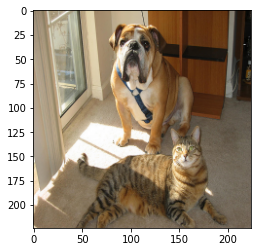

In [ ]:
img_path = '/content/pytorch-grad-cam/examples/both.png'
rgb_img = cv2.imread(img_path, 1)[:, :, ::-1]
rgb_img = cv2.resize(rgb_img, (224, 224))
rgb_img = np.float32(rgb_img) / 255
input_tensor = preprocess_image(rgb_img, mean=[0.5, 0.5, 0.5], 
                                          std=[0.5, 0.5, 0.5])
plt.imshow(rgb_img)

In [ ]:
input_tensor.shape

torch.Size([1, 3, 224, 224])

In [ ]:
target_layer = model.layer3[-1]
cam = GradCAM(model=model, target_layer=target_layer, use_cuda='--use-cuda')

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


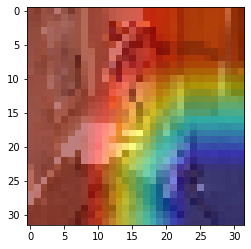

In [ ]:
# target_category = 281

# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor,eigen_smooth=True)

grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(rgb_img, grayscale_cam)
plt.imshow(visualization)

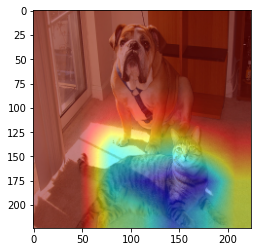

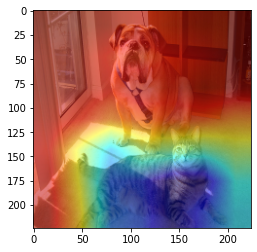